<br>
<br>
<br>
<br>

# Part 1 : Data Preperation

<br>
<br>
<br>
<br>

## dataset - columns

* ID
* name
* category
* main_category
* currency
* deadline
* goal - Goal amount in project currency
* launched
* pledged - Pledged amount in the project currency
* state
* backers
* country
* usd pledged - Pledged amount in USD (conversion made by KS)
* usd_pledged_real - Pledged amount in USD (conversion made by fixer.io api)
* usd_goal_real - Goal amount in USD

<br>
<br>
<br>

# Import libarary

<br>
<br>
<br>

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from GlobalFunction import *

pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('float_format', '{:f}'.format)

sns.set(style="white", color_codes=True)

<br>
<br>
<br>
<br>

# Part 1.1 : Data Cleaning

<br>
<br>
<br>
<br>

<br>
<br>
<br>

# Read The Data

<br>
<br>
<br>

In [2]:
df = readCSV("ks-projects-201801.csv")
df.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd_pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.000000,2015-08-11 12:12:28,0.000000,failed,0,GB,0.000000,0.000000,1533.950000
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.000000,2017-09-02 04:43:57,2421.000000,failed,15,US,100.000000,2421.000000,30000.000000
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.000000,2013-01-12 00:20:50,220.000000,failed,3,US,220.000000,220.000000,45000.000000
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.000000,2012-03-17 03:24:11,1.000000,failed,1,US,1.000000,1.000000,5000.000000
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.000000,2015-07-04 08:35:03,1283.000000,canceled,14,US,1283.000000,1283.000000,19500.000000


<br>
<br>

## Describe
<br>
<br>

In [3]:
getDescribe(df)

,attribute,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd_pledged,usd_pledged_real,usd_goal_real
0,count,378661.000000,378657,378661,378661,378661,378661,378661.000000,378661,378661.000000,378661,378661.000000,378661,374864.000000,378661.000000,378661.000000
1,unique,NaN,375764,159,15,14,3164,NaN,378089,NaN,6,NaN,23,NaN,NaN,NaN
2,top,NaN,New EP/Music Development,Product Design,Film & Video,USD,2014-08-08,NaN,1970-01-01 01:00:00,NaN,failed,NaN,US,NaN,NaN,NaN
3,freq,NaN,41,22314,63585,295365,705,NaN,7,NaN,197719,NaN,292627,NaN,NaN,NaN
4,mean,1074731191.988755,NaN,NaN,NaN,NaN,NaN,49080.791521,NaN,9682.979339,NaN,105.617476,NaN,7036.728867,9058.924074,45454.401465
5,std,619086204.322627,NaN,NaN,NaN,NaN,NaN,1183391.259093,NaN,95636.010005,NaN,907.185035,NaN,78639.745308,90973.343107,1152950.055088
6,min,5971.000000,NaN,NaN,NaN,NaN,NaN,0.010000,NaN,0.000000,NaN,0.000000,NaN,0.000000,0.000000,0.010000
7,25%,538263516.000000,NaN,NaN,NaN,NaN,NaN,2000.000000,NaN,30.000000,NaN,2.000000,NaN,16.980000,31.000000,2000.000000
8,50%,1075275634.000000,NaN,NaN,NaN,NaN,NaN,5200.000000,NaN,620.000000,NaN,12.000000,NaN,394.720000,624.330000,5500.000000
9,75%,1610148624.000000,NaN,NaN,NaN,NaN,NaN,16000.000000,NaN,4076.000000,NaN,56.000000,NaN,3034.090000,4050.000000,15500.000000


<br>
<br>

## casting dtypes

<br>
<br>

#### we can see data should be date or category mark as Object

#### now we will casting these columns


In [4]:

df.deadline = df.deadline.astype('datetime64')
df.launched = df.launched.astype('datetime64')

df.category = df.category.astype('category')
df.main_category = df.main_category.astype('category')
df.state = df.state.astype('category')
                
df.dtypes

ID                           int64
name                        object
category                  category
main_category             category
currency                    object
deadline            datetime64[ns]
goal                       float64
launched            datetime64[ns]
pledged                    float64
state                     category
backers                      int64
country                     object
usd_pledged                float64
usd_pledged_real           float64
usd_goal_real              float64
dtype: object

<br>
<br>

## Name column cleaning

<br>
<br>

#### now we remove all rows with null name. 
#### we are going to do a research about how the name of project impact on Success
#### so these records are not worth to our research.


In [5]:
df[df.name.isnull()]

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd_pledged,usd_pledged_real,usd_goal_real
166851,1848699072,NaN,Narrative Film,Film & Video,USD,2012-02-29,200000.000000,2012-01-01 12:35:31,100.000000,failed,1,US,100.000000,100.000000,200000.000000
307234,634871725,NaN,Video Games,Games,GBP,2013-01-06,2000.000000,2012-12-19 23:57:48,196.000000,failed,12,GB,317.730000,316.050000,3224.970000
309991,648853978,NaN,Product Design,Design,USD,2016-07-18,2500.000000,2016-06-18 05:01:47,0.000000,suspended,0,US,0.000000,0.000000,2500.000000
338931,796533179,NaN,Painting,Art,USD,2011-12-05,35000.000000,2011-11-06 23:55:55,220.000000,failed,5,US,220.000000,220.000000,35000.000000


In [6]:
df = df[df.name.notnull()]

<br>
<br>

## State column cleaning

<br>
<br>

#### we want to predict success  or failed of project
#### so now we will remove all project that not success or failed and create a numeric column of that **state_value**


In [7]:
df.state.unique()

[failed, canceled, successful, live, undefined, suspended]
Categories (6, object): [failed, canceled, successful, live, undefined, suspended]

In [8]:
df.groupby('state')['ID'].count()

state
canceled       38779
failed        197716
live            2799
successful    133956
suspended       1845
undefined       3562
Name: ID, dtype: int64

In [9]:
df = df.loc[df.state.isin(['failed','successful'])]

In [10]:
df.state = df.state.astype('object')
df.state = df.state.astype('category')

In [11]:
df['state_value'] = df.state.apply(lambda x : x== 'successful').astype(int)

In [12]:
df.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd_pledged,usd_pledged_real,usd_goal_real,state_value
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.000000,2015-08-11 12:12:28,0.000000,failed,0,GB,0.000000,0.000000,1533.950000,0
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.000000,2017-09-02 04:43:57,2421.000000,failed,15,US,100.000000,2421.000000,30000.000000,0
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.000000,2013-01-12 00:20:50,220.000000,failed,3,US,220.000000,220.000000,45000.000000,0
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.000000,2012-03-17 03:24:11,1.000000,failed,1,US,1.000000,1.000000,5000.000000,0
5,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01,50000.000000,2016-02-26 13:38:27,52375.000000,successful,224,US,52375.000000,52375.000000,50000.000000,1


<br>
<br>

## pledged and goal columns

<br>
<br>

#### we see that a lot of values are null in usd_pledged column
#### we read the describe of columns in this dataset that usd_pledged is convert money to USD
#### so we can use in usd_pledged_real column

<br>

In [13]:
df[df.usd_pledged.isnull()]

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd_pledged,usd_pledged_real,usd_goal_real,state_value
2457,1012744036,An Oratorio for our Time - Last Stop Cafe,Music,Music,USD,2016-05-26,5000.000000,2016-04-26 19:46:26,5170.000000,successful,0,"N,0""",nan,5170.000000,5000.000000,1
4892,1024989802,Jackson Ruby: The Cassette Album,Music,Music,USD,2016-05-11,5000.000000,2016-04-11 19:29:17,5296.000000,successful,0,"N,0""",nan,5296.000000,5000.000000,1
5353,1027275369,Help Parker Brown make his first solo album,Music,Music,USD,2016-05-21,3800.000000,2016-04-21 16:14:28,5077.000000,successful,0,"N,0""",nan,5077.000000,3800.000000,1
5597,1028691308,Help BETHANY record a NEW single in Nash!,Music,Music,USD,2016-05-08,3500.000000,2016-04-04 23:32:00,3502.130000,successful,0,"N,0""",nan,3502.130000,3500.000000,1
8260,1041708793,Serena Gabriel's first CD!!!!!!: Diving Deep,Music,Music,USD,2016-05-01,3500.000000,2016-03-25 17:20:21,3787.000000,successful,0,"N,0""",nan,3787.000000,3500.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368889,949401487,A Taste of San Diego's Singer Songwriters,Music,Music,USD,2016-05-09,7500.000000,2016-04-09 02:21:45,1408.000000,failed,0,"N,0""",nan,1408.000000,7500.000000,0
371387,962477474,Spoken Fruit Magazine,Print,Journalism,EUR,2016-04-28,15000.000000,2016-03-29 16:02:57,1933.000000,failed,0,"N,0""",nan,2204.210000,17104.540000,0
372375,967557880,Help Danelle Finish Her First EP Album,Music,Music,USD,2016-04-28,3500.000000,2016-04-05 18:56:21,3686.000000,successful,0,"N,0""",nan,3686.000000,3500.000000,1
375359,982919439,Faith,Film & Video,Film & Video,USD,2016-05-06,9000.000000,2016-03-07 04:17:33,2.000000,failed,0,"N,0""",nan,2.000000,9000.000000,0


In [14]:
df = df.drop(columns=['usd_pledged','pledged','goal','currency'])
df = df.rename({'usd_goal_real': 'goal', 'usd_pledged_real': 'pledged'}, axis='columns')
df.head()

,ID,name,category,main_category,deadline,launched,state,backers,country,pledged,goal,state_value
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,2015-10-09,2015-08-11 12:12:28,failed,0,GB,0.000000,1533.950000,0
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,2017-11-01,2017-09-02 04:43:57,failed,15,US,2421.000000,30000.000000,0
2,1000004038,Where is Hank?,Narrative Film,Film & Video,2013-02-26,2013-01-12 00:20:50,failed,3,US,220.000000,45000.000000,0
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,2012-04-16,2012-03-17 03:24:11,failed,1,US,1.000000,5000.000000,0
5,1000014025,Monarch Espresso Bar,Restaurants,Food,2016-04-01,2016-02-26 13:38:27,successful,224,US,52375.000000,50000.000000,1


<br>
<br>

## split the data
<br>
<br>

#### now split the data to  research train and test data

In [15]:
writeCSV(df,'cleanData.csv')
trainData = splitData(df,'cleanTrainData.csv','cleanTestData.csv')
trainData.shape

(238961, 12)

In [16]:
trainData

,ID,name,category,main_category,deadline,launched,state,backers,country,pledged,goal,state_value
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,2015-10-09,2015-08-11 12:12:28,failed,0,GB,0.000000,1533.950000,0
2,1000004038,Where is Hank?,Narrative Film,Film & Video,2013-02-26,2013-01-12 00:20:50,failed,3,US,220.000000,45000.000000,0
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,2012-04-16,2012-03-17 03:24:11,failed,1,US,1.000000,5000.000000,0
6,1000023410,Support Solar Roasted Coffee & Green Energy! ...,Food,Food,2014-12-21,2014-12-01 18:30:44,successful,16,US,1205.000000,1000.000000,1
10,100004721,Of Jesus and Madmen,Nonfiction,Publishing,2013-10-09,2013-09-09 18:19:37,failed,0,CA,0.000000,2406.390000,0
...,...,...,...,...,...,...,...,...,...,...,...,...
378652,999971898,Beach Wrestling Documentary,Documentary,Film & Video,2015-04-28,2015-03-29 21:30:33,successful,36,NO,2875.830000,2675.190000,1
378653,999972264,Islanda,Documentary,Film & Video,2012-03-16,2012-02-15 04:31:10,failed,1,US,25.000000,1700.000000,0
378657,999977640,The Tribe,Narrative Film,Film & Video,2011-07-19,2011-06-22 03:35:14,failed,5,US,155.000000,1500.000000,0
378658,999986353,Walls of Remedy- New lesbian Romantic Comedy f...,Narrative Film,Film & Video,2010-08-16,2010-07-01 19:40:30,failed,1,US,20.000000,15000.000000,0


<br>
<br>
<br>
<br>

# Part 1.2 : Data Visualization

<br>
<br>
<br>
<br>

In [17]:
def plotCounterPie(data,column,key = 'ID'):
    data = data.copy().groupby(column).count()[[key]].reset_index()
    data.columns =['col','counter']
    sizes= data.counter
    lables = data.col.values
    theme = plt.get_cmap('GnBu')
    
    fig, ax = plt.subplots(figsize=(10, 9))
    ax.set_prop_cycle("color", [theme(1. * i / len(sizes)) for i in range(len(sizes))])
    ax.pie(sizes,
           labels=lables,
           autopct='%1.1f%%',
           textprops={'size': 15}
          )
    ax.set_title("percent frequency values of  " + str(column), fontsize=22)
    
    plt.legend(
        loc='upper left',
        labels=['%s: %1.1f%%' % (
            l, (float(s) / sum(sizes)) * 100) for l, s in zip(lables, sizes)],
        prop={'size': 15},
        bbox_to_anchor=(-0.3, 0.8),
        bbox_transform=fig.transFigure
    )
    plt.show()
    
    
def plotColumnStateCompare(data,column, hue = 'state'):
    fig, ax = plt.subplots(1,1, figsize=(12,10))
    plt.subplot(212)
    ax = sns.countplot(x=column, hue=hue, data=data , palette='GnBu' )
    ax.set_title("Projects count by " + str(column), fontsize=22)
    ax.set_xlabel(str(column), fontsize=17)
    ax.set_ylabel("Count", fontsize=17),
    ax.legend(loc='upper right')
    plt.subplots_adjust(hspace = 0.4)
    plt.show()

<br>
<br>

## Plotting the success and fail percent

<br>
<br>

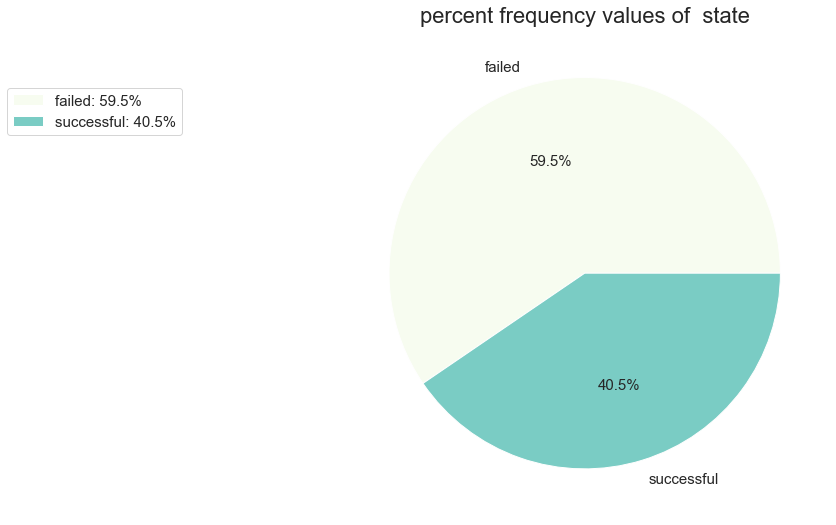

In [18]:
plotCounterPie(trainData,'state')

<br>
<br>

## Plotting the category frequency

<br>
<br>

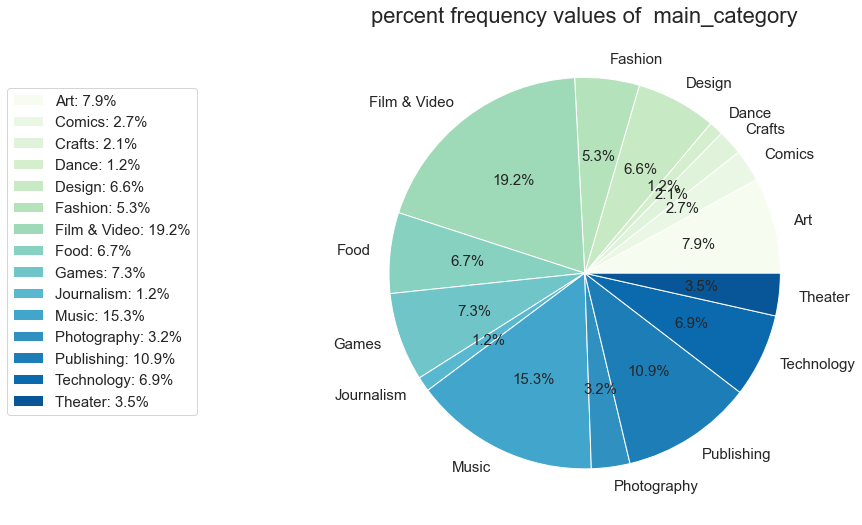

In [19]:
plotCounterPie(trainData,'main_category')

<br>
<br>

## Plotting compare succuss or fail by Country

<br>
<br>


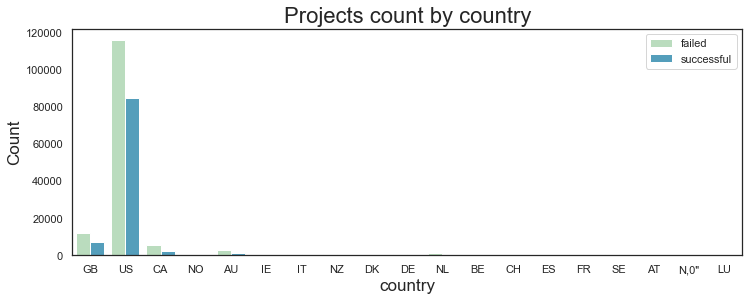

In [20]:
plotColumnStateCompare(trainData,'country')

<br>
<br>

## Plotting compare succuss or fail by main category

<br>
<br>


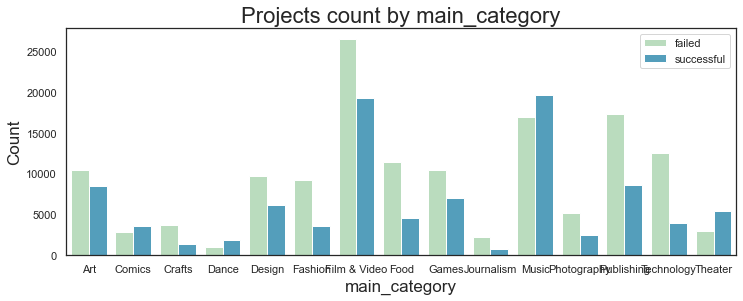

In [21]:
plotColumnStateCompare(trainData,'main_category')

<br>
<br>

## Bar Plot of median backers by main category

<br>
<br>


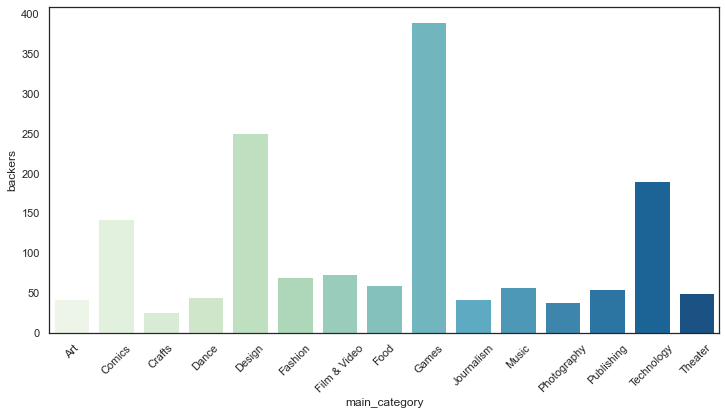

In [22]:
data = trainData.copy().groupby('main_category').mean().reset_index()
fig, ax = plt.subplots(1,1, figsize=(12,6))
sns.barplot(x="main_category", y="backers", data=data,palette="GnBu", ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.show()


<br>
<br>


## Plotting compare succuss or fail by goal
<br>
here I used in log1p to get more accuary plot
<br>
<br>


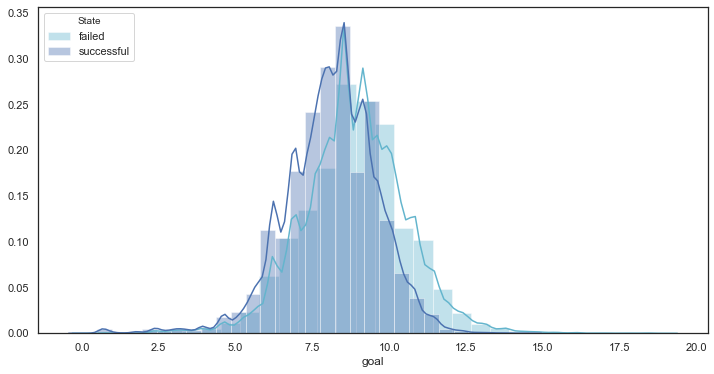

In [23]:
failed = np.log1p(trainData[trainData.state == 'failed'].goal)
success = np.log1p(trainData[trainData.state == 'successful'].goal)
plt.figure(figsize=(12,6))
sns.distplot(failed, bins=30, norm_hist=True,color = 'c')
sns.distplot(success, bins=30, norm_hist=True, color = 'b')
plt.legend(title='State', loc='upper left', labels=['failed', 'successful'])
plt.show()

<br>


## Plotting compare succuss or fail by backers

<br>


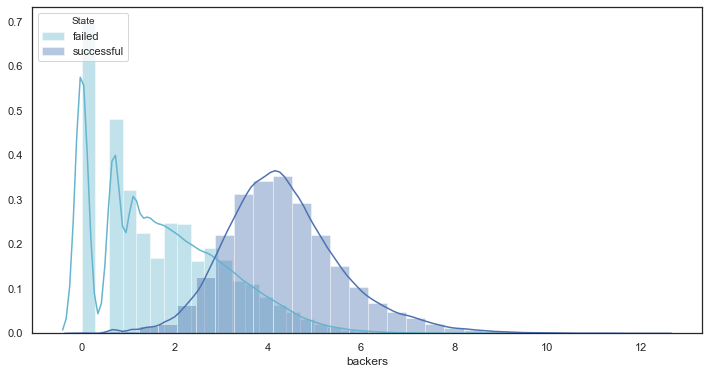

In [24]:
failed = np.log1p(trainData[trainData.state == 'failed'].backers)
success = np.log1p(trainData[trainData.state == 'successful'].backers)
plt.figure(figsize=(12,6))
sns.distplot(failed, bins=30, norm_hist=True, color = 'c')
sns.distplot(success, bins=30, norm_hist=True,color = 'b')
plt.legend(title='State', loc='upper left', labels=['failed', 'successful'])
plt.show()

<br>


## Plot Correlation

<br>


In [25]:
plotCorr(trainData)

,ID,backers,pledged,goal,state_value
ID,1,0.00036,0.00039,0.0026,-0.0016
backers,0.00036,1,0.77,0.0073,0.11
pledged,0.00039,0.77,1,0.0083,0.099
goal,0.0026,0.0073,0.0083,1,-0.023
state_value,-0.0016,0.11,0.099,-0.023,1


<br>
<br>
<br>
<br>


# conclusion :



## * we can see that the number of backers has a big impact on success
## * we can see the connection between number of backers to pledged
## * its look like when the goal its low we get more successful
## * Distribution of the goal variable. We can observe goal is highly skewed to the right.
## * its look like Game category get the most high backers mean
## * most of the projects are from US

<br>
<br>
<br>
<br>
